In [297]:
from prophet import Prophet
import pandas as pd
import warnings
from sklearn.metrics import root_mean_squared_error
warnings.filterwarnings("ignore")
import logging
logging.getLogger("cmdstanpy").setLevel(logging.WARNING)
logging.getLogger("prophet").setLevel(logging.WARNING)
import matplotlib.pyplot as plt

In [289]:
bike_sharing=fetch_ucirepo(id=275)
X=bike_sharing.data.features
Y=bike_sharing.data.targets

In [318]:
x=X.copy()
x["y"]=Y["cnt"]

In [ ]:
x=pd.DataFrame(x)
ds=pd.to_datetime(x["dteday"])+pd.to_timedelta(x["hr"],unit="h")
x=x.drop(columns=["dteday", "hr"])
for col in x.columns:
    x[col] = pd.to_numeric(x[col], errors="coerce")
x["ds"]=ds
x=x[['ds','y','holiday','workingday','weathersit','temp','atemp','hum','windspeed']]

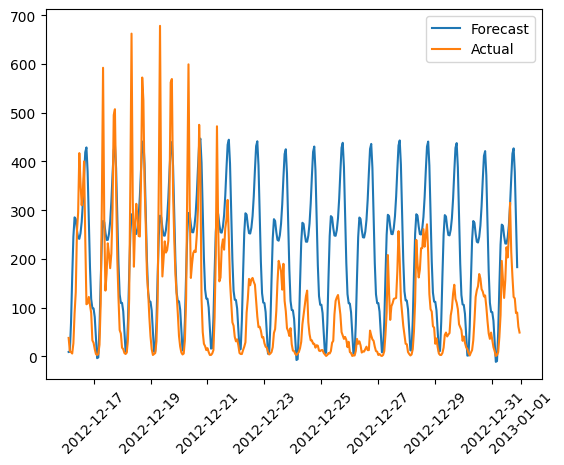

(161.45175768910931, 105.38997143835415)

In [ ]:
# last 379 hrs
train=x.iloc[:17000,:]
model=Prophet(uncertainty_samples=0)
model.fit(train)
future = model.make_future_dataframe(periods=379, freq="H")
forecast = model.predict(future)
plt.plot(forecast.iloc[17000:,:]["ds"],forecast.iloc[17000:,:]["yhat"], label="Forecast")
plt.plot(x.iloc[17000:,:]["ds"],x.iloc[17000:,:]["y"],label="Actual")
plt.xticks(rotation=45)
plt.legend()
plt.show()
root_mean_squared_error(forecast.iloc[17000:,:]["yhat"],x.iloc[17000:,:]["y"]),forecast.iloc[17000:,:]["yhat"].mean()-x.iloc[17000:,:]["y"].mean()

In [ ]:
# mean 100

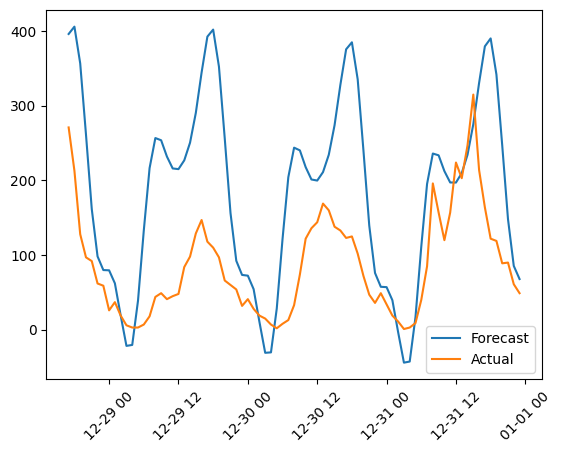

(135.5182532994847, 98.73987195693189)

In [322]:
# last 79 hrs
train=x.iloc[:17300,:]
model=Prophet()
model.fit(train)
future = model.make_future_dataframe(periods=79, freq="H")
forecast = model.predict(future)
plt.plot(forecast.iloc[17300:,:]["ds"],forecast.iloc[17300:,:]["yhat"], label="Forecast")
plt.plot(x.iloc[17300:,:]["ds"],x.iloc[17300:,:]["y"],label="Actual")
plt.xticks(rotation=45)
plt.legend()
plt.show()
root_mean_squared_error(forecast.iloc[17300:,:]["yhat"],x.iloc[17300:,:]["y"]),forecast.iloc[17300:,:]["yhat"].mean()-x.iloc[17300:,:]["y"].mean()

In [ ]:
# lets's say mean is 100

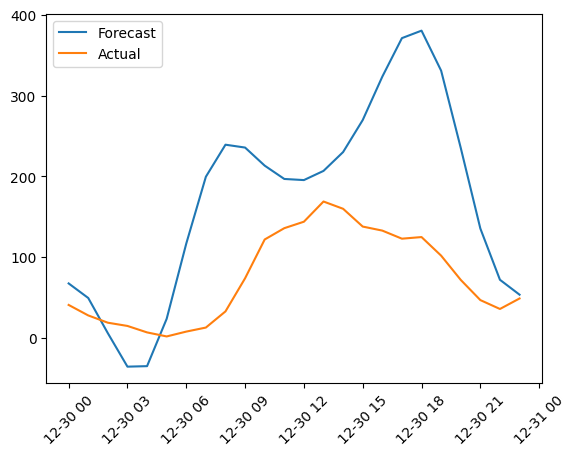

(130.94700711587345, 95.35097064845804)

In [323]:
# 2nd last day
train=x.iloc[:17331,:]
model=Prophet()
model.fit(train)
future = model.make_future_dataframe(periods=24, freq="H")
forecast = model.predict(future)
plt.plot(forecast.iloc[17331:,:]["ds"],forecast.iloc[17331:,:]["yhat"], label="Forecast")
plt.plot(x.iloc[17331:(17331+24),:]["ds"],x.iloc[17331:(17331+24),:]["y"],label="Actual")
plt.xticks(rotation=45)
plt.legend()
plt.show()
root_mean_squared_error(forecast.iloc[17331:,:]["yhat"],x.iloc[17331:(17331+24),:]["y"]),forecast.iloc[17331:,:]["yhat"].mean()-x.iloc[17331:(17331+24),:]["y"].mean()

In [ ]:
# so prediction ahead say more than 24 is just like an unpredictable day, with error in means at around 100

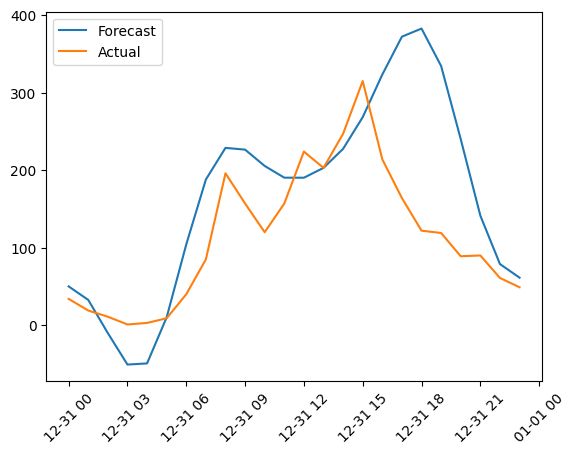

(98.8781687094138, 50.87536866139733)

In [324]:
# last 24 hrs
train=x.iloc[:-24,:]
model=Prophet()
model.fit(train)
future = model.make_future_dataframe(periods=24, freq="H")
forecast = model.predict(future)
plt.plot(forecast.iloc[17355:,:]["ds"],forecast.iloc[17355:,:]["yhat"], label="Forecast")
plt.plot(x.iloc[17355:,:]["ds"],x.iloc[17355:,:]["y"],label="Actual")
plt.xticks(rotation=45)
plt.legend()
plt.show()
root_mean_squared_error(forecast.iloc[17355:,:]["yhat"],x.iloc[17355:,:]["y"]),forecast.iloc[17355:,:]["yhat"].mean()-x.iloc[17355:,:]["y"].mean()

In [ ]:
# predictable day, error in mean 50

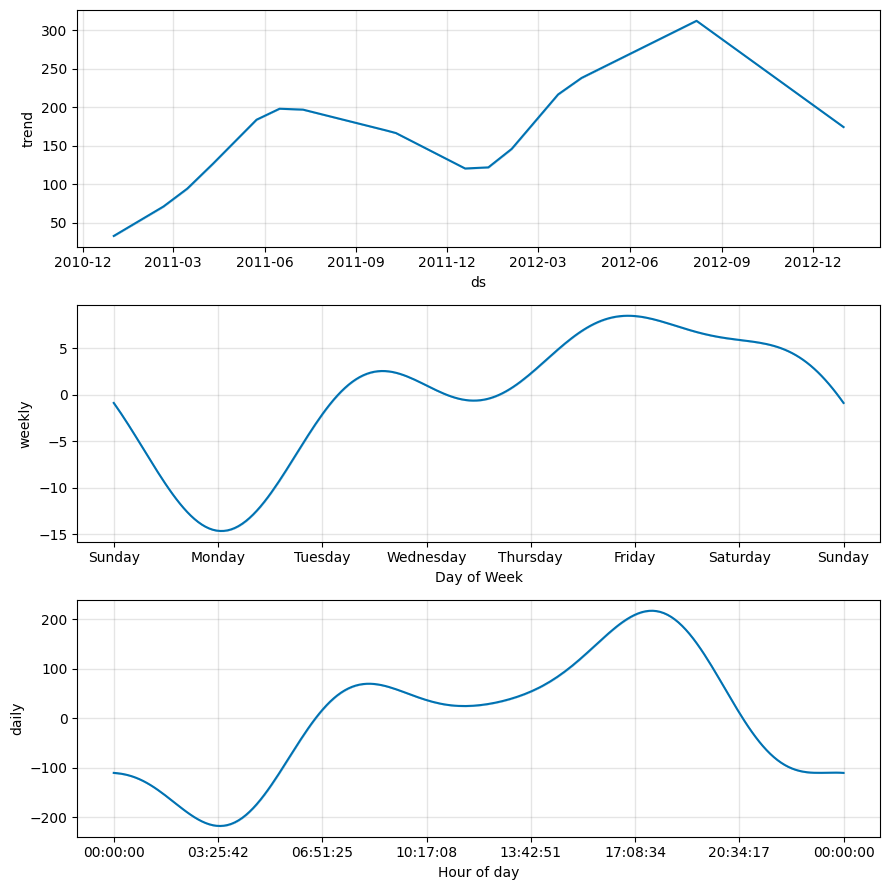

In [325]:
fig2 = model.plot_components(forecast)
plt.show()